<a href="https://colab.research.google.com/github/divakarkumar424/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/zomato_restaurant_clustering_and_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font color='red'>Zomato Restaurant | Clustering | Sentiment Analysis  </font>
------------------------------------------------------------------------
<img target="_blank" src="https://user-images.githubusercontent.com/32620288/141148382-f9456b7f-9607-4bf2-99c2-9b1cc3a7a034.png" width=500; height=300>

----------------------------------------------------------------------------
### Business Problem Analysis
Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. With every state, you can find something different to love. Besides traditional North Indian and South Indian food, the food culture is heavily inspired by and evolved around various civilizations. To say that Indians are food lovers would be an understatement. The restaurant business in India has been booming and people even like to celebrate small occasions of their lives with good food and great ambiance. The number of restaurant are increasing day by day. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. This Zomato data aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place.

In this notebook I will try analyzing the Buisness Problem of Zomato and create a practical recommendation system for users.

The problem statement here has two datasets for us to work on:

* Zomato Restaurant Names and Metadata

* Zomato Restaurant Reviews

To assure Zomato's success it is important for the company to analyze its datasets and make appropriate strategic decisions. The problem statement here asks us to cluster the restaurants to help customers find the best restaurants in their city and according to their taste and understand the fields they are lagging in. This will help Zomato in building a good recommendation system for their customers. Do a cost-benefit analysis using the cuisines and costs of the restaurants. In order to understand fields that need to be worked upon, it is important to do sentiment analysis to get an idea about how people really feel about a particular restaurant. To identify the industry critics and especially work on their reviews to build a reputation worth praising.

---------------------------------------------------------------------------------------------------------------------------

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats
from wordcloud import WordCloud

### <font color='red'>----- Clustering ------</font>

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path ='/content/drive/MyDrive/Colab Notebooks'

In [ ]:
#Reading dataset
metadata = pd.read_csv('/content/drive/MyDrive/Restaurant names and Metadata.csv')

In [ ]:
metadata.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# dimension of data
metadata.shape

(105, 6)

In [ ]:
metadata.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
# duplicate
print('Duplicate of Zomato Restaurant Data:', len(metadata[metadata.duplicated()]))

Duplicate of Zomato Restaurant Data: 0


In [ ]:
# Check metadata Review Data Information
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
#check null value in metadata
metadata.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Check for missing values

In [ ]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in metadata.columns if metadata[feature].isnull().sum()>1 and metadata[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(metadata[feature].isnull().mean(),4)))

Collections: 0.5143% missing values


<Axes: >

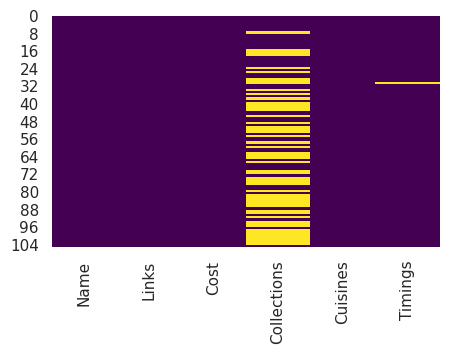

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(metadata.isnull(),cbar=False,cmap='viridis')

In [ ]:
metadata.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
# replace null values with zero '0'

metadata['Collections'].fillna('Unknown', inplace=True)

#drop NaN values

metadata.dropna(how='any',inplace=True)

metadata.isnull().sum()

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

In [ ]:
# Value count for cost
metadata.Cost.value_counts

<bound method IndexOpsMixin.value_counts of 0        800
1        800
2      1,300
3        800
4      1,200
       ...  
100      600
101      200
102      500
103      250
104    1,700
Name: Cost, Length: 104, dtype: object>

In [ ]:
# Change the data type of cost
metadata.cost = metadata.Cost.astype(str).str.replace(",","").astype('int64')

In [ ]:
metadata.cost

0       800
1       800
2      1300
3       800
4      1200
       ... 
100     600
101     200
102     500
103     250
104    1700
Name: Cost, Length: 104, dtype: int64

In [ ]:
#Dropping unneccesary column  because not helpful
metadata = metadata.drop(['Links', 'Timings'],axis = 1)
metadata.head()

,Name,Cost,Collections,Cuisines
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,Flechazo,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


In [ ]:
copy_metadata = metadata.drop(['Name'],axis = 1)
copy_metadata.head()

,Cost,Collections,Cuisines
0,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


In [ ]:
metadata.shape

(104, 4)

In [ ]:
print(metadata.apply(lambda col: col.unique()))

Name           [Beyond Flavours, Paradise, Flechazo, Shah Gho...
Cost           [800, 1,300, 1,200, 1,500, 500, 300, 1,000, 35...
Collections    [Food Hygiene Rated Restaurants in Hyderabad, ...
Cuisines       [Chinese, Continental, Kebab, European, South ...
dtype: object


In [ ]:
# cuisine column converted to list
metadata['Cuisines'] = metadata['Cuisines'].str.replace(' ','')
metadata['Cuisines'] = metadata['Cuisines'].str.split(',')

In [ ]:
metadata['Cuisines']

0      [Chinese, Continental, Kebab, European, SouthI...
1                        [Biryani, NorthIndian, Chinese]
2          [Asian, Mediterranean, NorthIndian, Desserts]
3      [Biryani, NorthIndian, Chinese, Seafood, Bever...
4      [Asian, Continental, NorthIndian, Chinese, Med...
                             ...                        
100                                    [FastFood, Salad]
101                                     [Bakery, Mithai]
102                      [NorthIndian, Biryani, Chinese]
103                                           [FastFood]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 104, dtype: object

In [ ]:
metadata['Cost'].value_counts()[:10]

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
Name: Cost, dtype: int64

Text(0.5, 0, 'Average Cost')

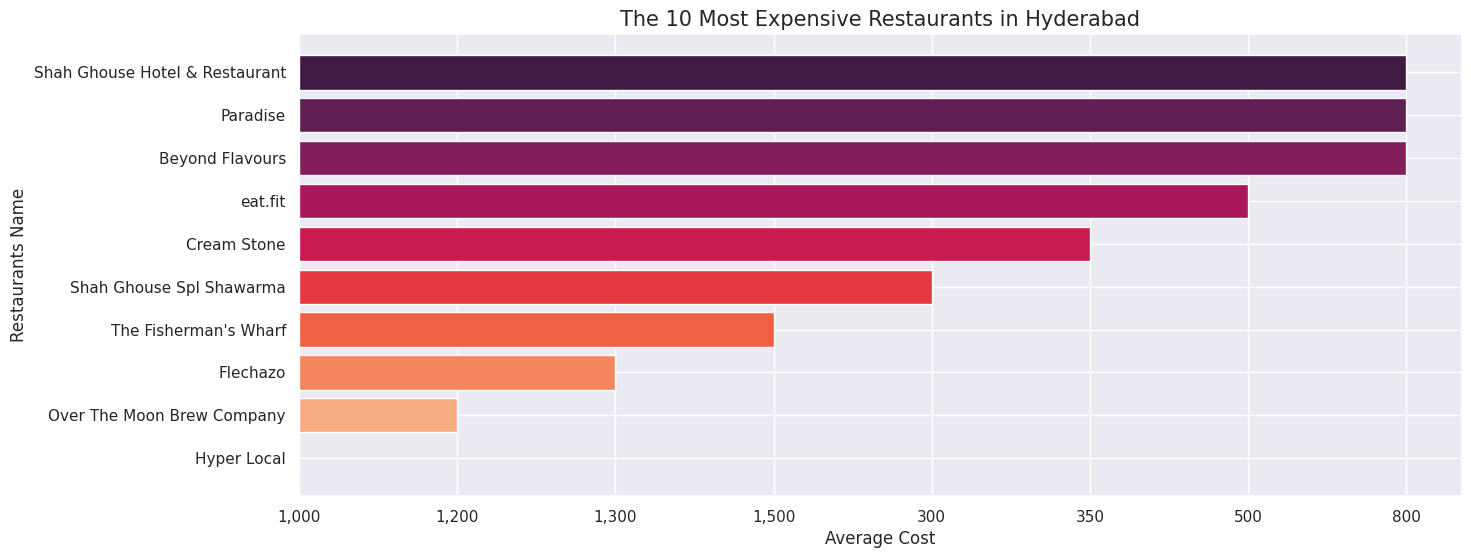

In [ ]:
# checking for most expensive Restaurant
best_10 = metadata[:10]
ax=best_10.sort_values(by='Cost',ascending=True,inplace=True)
plt.figure(figsize=(15,6))
plt.barh(best_10['Name'],best_10['Cost'], color = sns.color_palette("rocket_r", 11))
plt.title('The 10 Most Expensive Restaurants in Hyderabad',size=15)
plt.ylabel('Restaurants Name',size=12)
plt.xlabel('Average Cost',size=12)

Text(0.5, 0, 'Average Cost')

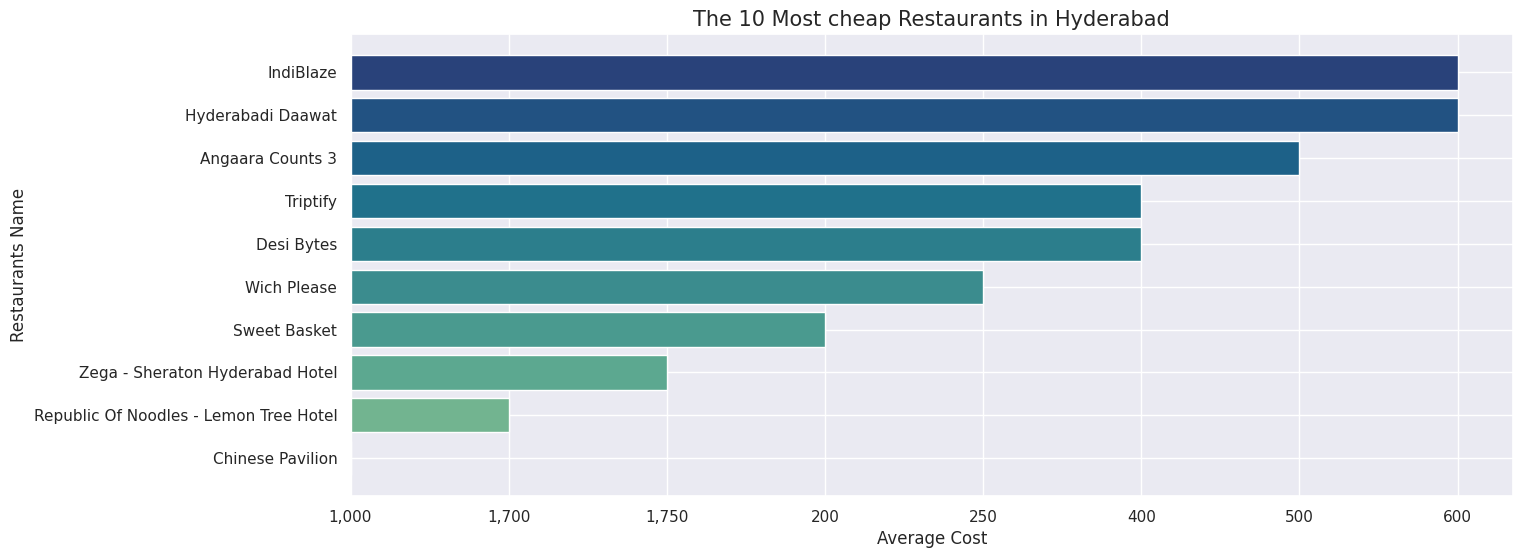

In [ ]:
# checking for most cheap Restaurant
best_10 = metadata[-10:]
best_10.sort_values(by='Cost',ascending=True,inplace=True)
plt.figure(figsize=(15,6))
plt.barh(best_10['Name'],best_10['Cost'], color = sns.color_palette("crest", 10))
plt.title('The 10 Most cheap Restaurants in Hyderabad',size=15)
plt.ylabel('Restaurants Name',size=12)
plt.xlabel('Average Cost',size=12)

In [ ]:
#  Creating sparse matrix for cuisine and joining it to meta_df
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize MultiLabelBinarizer with sparse output
mlb = MultiLabelBinarizer(sparse_output=True)

# Apply one-hot encoding to 'Cuisines' column and join the result back to the DataFrame
metadata = metadata.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(metadata.pop('Cuisines')),  # Fit and transform the 'Cuisines' column
        index=metadata.index,                        # Preserve the original DataFrame index
        columns=mlb.classes_                         # Use binarizer classes as column names
    )
)

# Display the resulting DataFrame
metadata.head()

,Name,Cost,Collections,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...",0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,Hyderabad's Hottest,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,"1,300","Great Buffets, Hyderabad's Hottest",0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...",0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Top Most famous cuisine
Top_cuisine = metadata.drop(['Name','Cost','Collections'],axis = 1).sum().sort_values(ascending=False)[:5]
print('Top Most famous cuisine:', Top_cuisine)

Top Most famous cuisine: NorthIndian    60
Chinese        43
Continental    21
Biryani        16
Asian          15
dtype: int64


Text(0, 0.5, 'Cuisines')

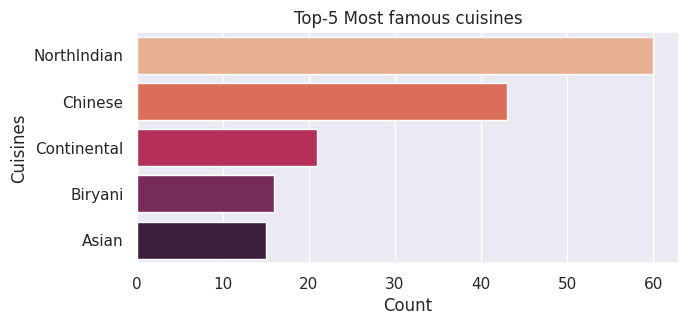

In [ ]:
# Top Most famous cuisine

plt.figure(figsize = (7,3))
sns.barplot(y = Top_cuisine.index,
            x = Top_cuisine,palette = "rocket_r")
plt.title('Top-5 Most famous cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisines')

In [ ]:
# Top Most famous cuisine
Bottom_cuisine = metadata.drop(['Name','Cost','Collections'],axis = 1).sum().sort_values(ascending=False)[-5:]
Bottom_cuisine

Pizza          1
HealthyFood    1
Goan           1
Spanish        1
Wraps          1
dtype: int64

Text(0, 0.5, 'Cuisines')

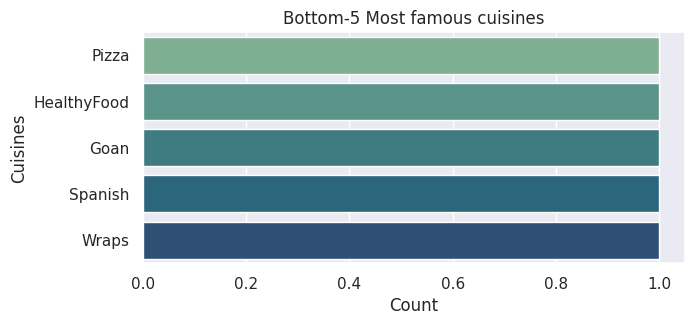

In [ ]:
# Top Most famous cuisine

plt.figure(figsize = (7,3))
sns.barplot(y = Bottom_cuisine.index,
            x = Bottom_cuisine,palette = "crest")
plt.title('Bottom-5 Most famous cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisines')

In [ ]:
metadata['Collections'] = metadata['Collections'].str.replace('\d+', '')

In [ ]:
Top_Collections = metadata['Collections'].value_counts()[:5]
Top_Collections

Unknown                                        53
Food Hygiene Rated Restaurants in Hyderabad     4
Great Buffets                                   2
New on Gold                                     2
Hyderabad's Hottest                             2
Name: Collections, dtype: int64

Text(0, 0.5, 'Collections')

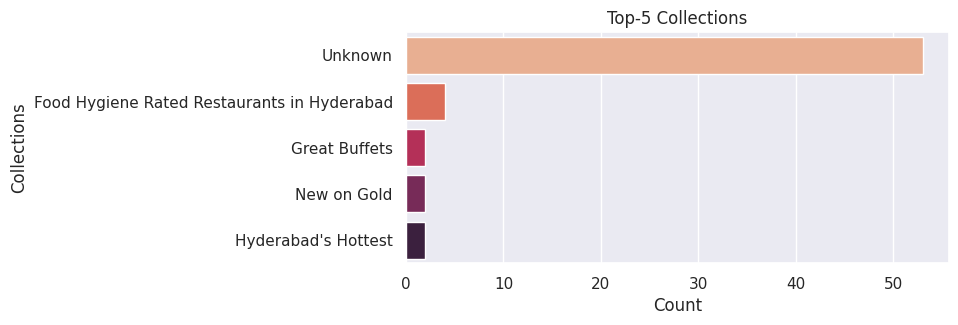

In [ ]:
# Top Most famous Collections

plt.figure(figsize = (7,3))
sns.barplot(y = Top_Collections.index,
            x = Top_Collections,palette = "rocket_r")
plt.title('Top-5 Collections')
plt.xlabel('Count')
plt.ylabel('Collections')

In [ ]:
Bottom_Collections = metadata['Collections'].value_counts()[-5:]
Bottom_Collections

Live Sports Screenings, Gigs and Events               1
Rooftops, Live Sports Screenings, Best Bars & Pubs    1
Barbecue & Grill, Live Sports Screenings              1
Mandi, Great Buffets, The ‘Must Visit’ Eateries       1
Sunday Brunches                                       1
Name: Collections, dtype: int64

Text(0, 0.5, 'Collections')

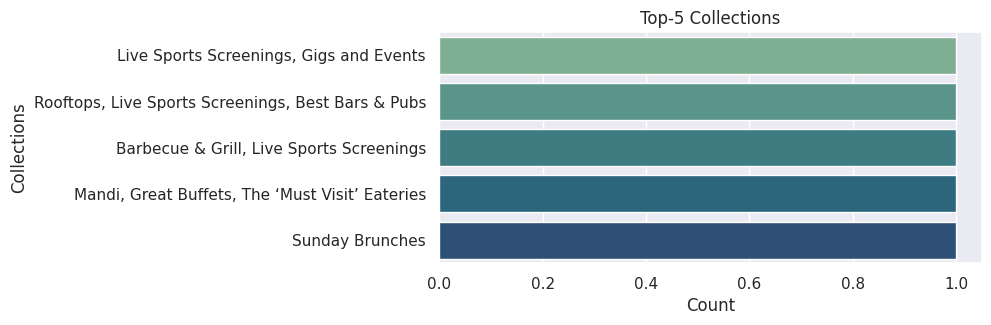

In [ ]:
# Bottom Most famous Collections

plt.figure(figsize = (7,3))
sns.barplot(y = Bottom_Collections.index,
            x = Bottom_Collections,palette = "crest")
plt.title('Top-5 Collections')
plt.xlabel('Count')
plt.ylabel('Collections')

In [ ]:
metadata['Collections']

0      Food Hygiene Rated Restaurants in Hyderabad, C...
1                                    Hyderabad's Hottest
2                     Great Buffets, Hyderabad's Hottest
3                                 Late Night Restaurants
4      Best Bars & Pubs, Food Hygiene Rated Restauran...
                             ...                        
100                                              Unknown
101                                              Unknown
102                                              Unknown
103                                              Unknown
104                                 Pan-Asian Delicacies
Name: Collections, Length: 104, dtype: object

In [ ]:
copy_metadata[copy_metadata['Collections']=='Food Hygiene Rated Restaurants in Hyderabad']

,Cost,Collections,Cuisines
6,500,Food Hygiene Rated Restaurants in Hyderabad,"Healthy Food, North Indian, Continental, South..."
67,"1,200",Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Hyderabadi"
87,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger"
96,600,Food Hygiene Rated Restaurants in Hyderabad,"Hyderabadi, Chinese, Mughlai"


In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
copy_metadata['Collections'][0]

'Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings'

In [ ]:
# Removing punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
copy_metadata['Collections'] = copy_metadata['Collections'].apply(remove_punctuation)
copy_metadata.head()

,Cost,Collections,Cuisines
0,800,Food Hygiene Rated Restaurants in Hyderabad Co...,"Chinese, Continental, Kebab, European, South I..."
1,800,Hyderabads Hottest,"Biryani, North Indian, Chinese"
2,"1,300",Great Buffets Hyderabads Hottest,"Asian, Mediterranean, North Indian, Desserts"
3,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,"1,200",Best Bars Pubs Food Hygiene Rated Restaurants...,"Asian, Continental, North Indian, Chinese, Med..."


In [ ]:
#Removing stop words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
print("Number of stopwards:  ", len(sw) )

Number of stopwards:   179


In [ ]:
#Defining stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
copy_metadata['Collections'] = copy_metadata['Collections'].apply(stopwords)
copy_metadata.head()

,Cost,Collections,Cuisines
0,800,food hygiene rated restaurants hyderabad corpo...,"Chinese, Continental, Kebab, European, South I..."
1,800,hyderabads hottest,"Biryani, North Indian, Chinese"
2,"1,300",great buffets hyderabads hottest,"Asian, Mediterranean, North Indian, Desserts"
3,800,late night restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,"1,200",best bars pubs food hygiene rated restaurants ...,"Asian, Continental, North Indian, Chinese, Med..."


In [ ]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(copy_metadata['Collections'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

#### Store the vocab and counts in a pandas dataframe

In [ ]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# Sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [ ]:
vocab_bef_stem

week        68
visit       67
venues      66
veggie      65
unknown     64
            ..
biryanis     4
best         3
bars         2
barbecue     1
bakeries     0
Length: 69, dtype: int64

<Axes: >

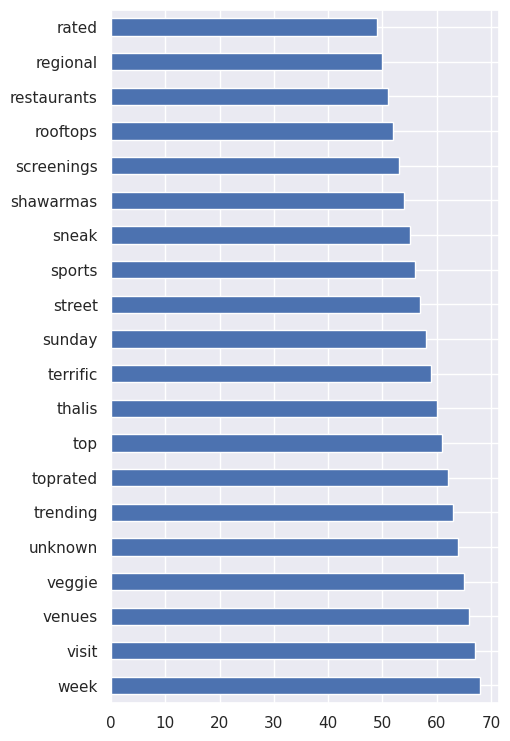

In [ ]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = "barh", figsize=(5,9))

In [ ]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
#Stemming for description
copy_metadata['Collections'] = copy_metadata['Collections'].apply(stemming)
copy_metadata.head()

,Cost,Collections,Cuisines
0,800,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I..."
1,800,hyderabad hottest,"Biryani, North Indian, Chinese"
2,"1,300",great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts"
3,800,late night restaur,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,"1,200",best bar pub food hygien rate restaur hyderaba...,"Asian, Continental, North Indian, Chinese, Med..."


#### Top words after stemming operation
##### Collect vocabulary count

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(copy_metadata['Collections'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

<Axes: >

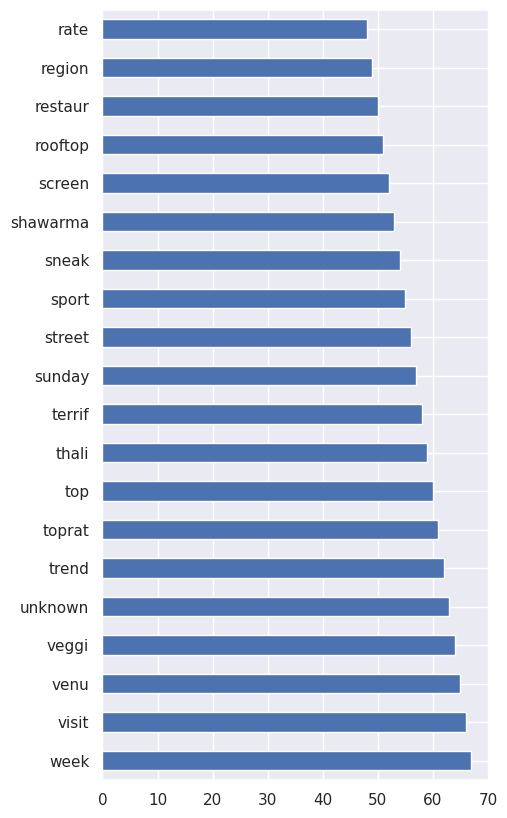

In [ ]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# Sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# Plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10))

In [ ]:
def length(text):
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
copy_metadata['collections'] = copy_metadata['Collections'].apply(length)
copy_metadata.head()

,Cost,Collections,Cuisines,collections
0,800,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...",98
1,800,hyderabad hottest,"Biryani, North Indian, Chinese",17
2,"1,300",great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts",30
3,800,late night restaur,"Biryani, North Indian, Chinese, Seafood, Bever...",18
4,"1,200",best bar pub food hygien rate restaur hyderaba...,"Asian, Continental, North Indian, Chinese, Med...",83


In [ ]:
copy_metadata['Cuisines'][0]

'Chinese, Continental, Kebab, European, South Indian, North Indian'

#### Repeating same procedure for listed_in

In [ ]:
#Remove punctuation for listed_in
copy_metadata['Cuisines'] = copy_metadata['Cuisines'].apply(remove_punctuation)
copy_metadata.head()

,Cost,Collections,Cuisines,collections
0,800,food hygien rate restaur hyderabad corpor favo...,Chinese Continental Kebab European South India...,98
1,800,hyderabad hottest,Biryani North Indian Chinese,17
2,"1,300",great buffet hyderabad hottest,Asian Mediterranean North Indian Desserts,30
3,800,late night restaur,Biryani North Indian Chinese Seafood Beverages,18
4,"1,200",best bar pub food hygien rate restaur hyderaba...,Asian Continental North Indian Chinese Mediter...,83


In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# Fit the count vectorizer using the text data
count_vectorizer.fit(copy_metadata['Cuisines'])
# Collect the vocabulary items used in the vectorizer
dictionary_l = count_vectorizer.vocabulary_.items()

In [ ]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary_l:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [ ]:
vocab_bef_stem

wraps            46
thai             45
sushi            44
street           43
spanish          42
south            41
seafood          40
salad            39
pizza            38
north            37
mughlai          36
momos            35
modern           34
mithai           33
mexican          32
mediterranean    31
malaysian        30
lebanese         29
kebab            28
juices           27
japanese         26
italian          25
indonesian       24
indian           23
ice              22
hyderabadi       21
healthy          20
goan             19
food             18
finger           17
fast             16
european         15
eastern          14
desserts         13
cream            12
continental      11
chinese          10
cafe              9
burger            8
biryani           7
beverages         6
bbq               5
bakery            4
asian             3
arabian           2
andhra            1
american          0
dtype: int64

<Axes: >

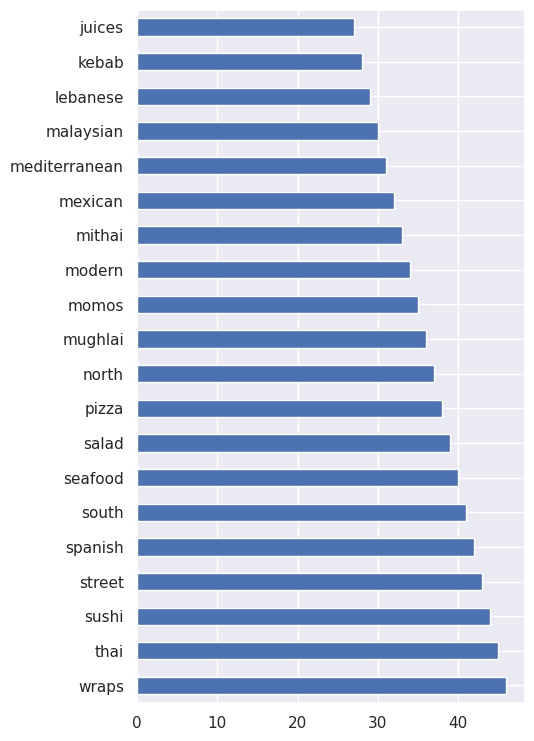

In [ ]:
#Plotting top words
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,9))

In [ ]:
# Stemming for listed_in
copy_metadata['Cuisines'] = copy_metadata['Cuisines'].apply(stemming)
copy_metadata.head()

,Cost,Collections,Cuisines,collections
0,800,food hygien rate restaur hyderabad corpor favo...,chines continent kebab european south indian n...,98
1,800,hyderabad hottest,biryani north indian chines,17
2,"1,300",great buffet hyderabad hottest,asian mediterranean north indian dessert,30
3,800,late night restaur,biryani north indian chines seafood beverag,18
4,"1,200",best bar pub food hygien rate restaur hyderaba...,asian continent north indian chines mediterranean,83


In [ ]:
def length(text):
    '''a function which returns the length of text'''
    return len(text)

# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(copy_metadata['Cuisines'])

# Collect the vocabulary items used in the vectorizer
dictionary_cuisines = tfid_vectorizer.vocabulary_.items()

In [ ]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary_l:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [ ]:
vocab_bef_stem

wraps            46
thai             45
sushi            44
street           43
spanish          42
south            41
seafood          40
salad            39
pizza            38
north            37
mughlai          36
momos            35
modern           34
mithai           33
mexican          32
mediterranean    31
malaysian        30
lebanese         29
kebab            28
juices           27
japanese         26
italian          25
indonesian       24
indian           23
ice              22
hyderabadi       21
healthy          20
goan             19
food             18
finger           17
fast             16
european         15
eastern          14
desserts         13
cream            12
continental      11
chinese          10
cafe              9
burger            8
biryani           7
beverages         6
bbq               5
bakery            4
asian             3
arabian           2
andhra            1
american          0
dtype: int64

<Axes: >

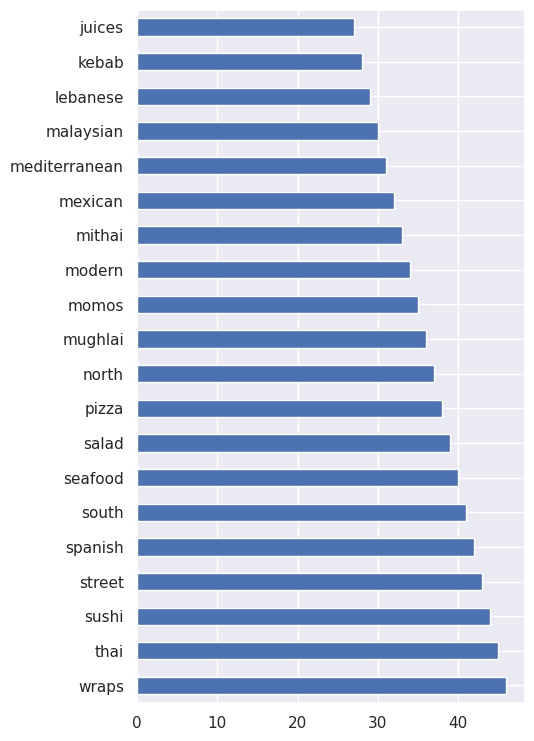

In [ ]:
#Plotting top words
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,9))

In [ ]:
# Stemming for listed_in
copy_metadata['cuisines'] = copy_metadata['Cuisines'].apply(stemming)
copy_metadata.head()

,Cost,Collections,Cuisines,collections,cuisines
0,800,food hygien rate restaur hyderabad corpor favo...,chines continent kebab european south indian n...,98,chine contin kebab european south indian north...
1,800,hyderabad hottest,biryani north indian chines,17,biryani north indian chine
2,"1,300",great buffet hyderabad hottest,asian mediterranean north indian dessert,30,asian mediterranean north indian dessert
3,800,late night restaur,biryani north indian chines seafood beverag,18,biryani north indian chine seafood beverag
4,"1,200",best bar pub food hygien rate restaur hyderaba...,asian continent north indian chines mediterranean,83,asian contin north indian chine mediterranean


In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(copy_metadata['Cuisines'])

# Collect the vocabulary items used in the vectorizer
dictionary_listed_in = tfid_vectorizer.vocabulary_.items()

<Axes: >

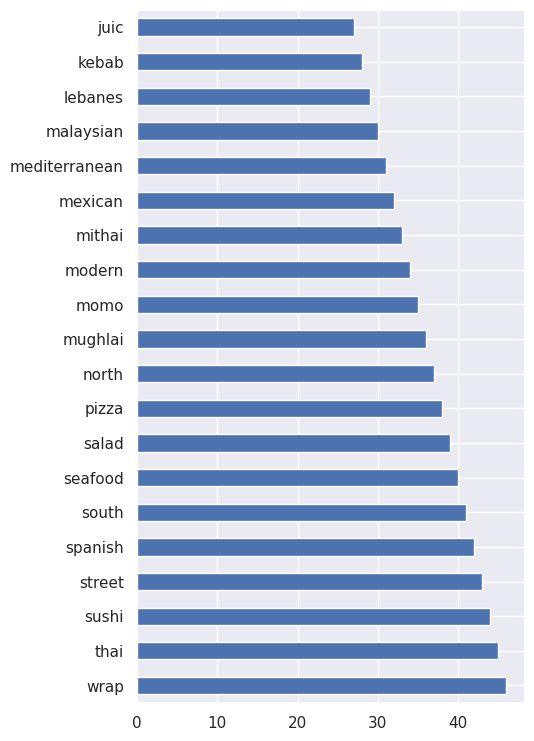

In [ ]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary_listed_in:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# Sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# Plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,9))

In [ ]:
copy_metadata['cuisines'] = copy_metadata['Cuisines'].apply(length)
copy_metadata.head()

,Cost,Collections,Cuisines,collections,cuisines
0,800,food hygien rate restaur hyderabad corpor favo...,chines continent kebab european south indian n...,98,57
1,800,hyderabad hottest,biryani north indian chines,17,27
2,"1,300",great buffet hyderabad hottest,asian mediterranean north indian dessert,30,40
3,800,late night restaur,biryani north indian chines seafood beverag,18,43
4,"1,200",best bar pub food hygien rate restaur hyderaba...,asian continent north indian chines mediterranean,83,49


In [ ]:
copy_metadata[['Collections','Cuisines']]

,Collections,Cuisines
0,food hygien rate restaur hyderabad corpor favo...,chines continent kebab european south indian n...
1,hyderabad hottest,biryani north indian chines
2,great buffet hyderabad hottest,asian mediterranean north indian dessert
3,late night restaur,biryani north indian chines seafood beverag
4,best bar pub food hygien rate restaur hyderaba...,asian continent north indian chines mediterranean
...,...,...
100,unknown,fast food salad
101,unknown,bakeri mithai
102,unknown,north indian biryani chines
103,unknown,fast food


### Applying Silhouetee Score Method

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [ ]:
X_features_rec_mon = copy_metadata[["collections", "cuisines"]]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X = X_rec_mon

range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4755753565576131
For n_clusters = 3, silhouette score is 0.4639383478027064
For n_clusters = 4, silhouette score is 0.47037260043004403
For n_clusters = 5, silhouette score is 0.4380255062163132
For n_clusters = 6, silhouette score is 0.46396089776904775
For n_clusters = 7, silhouette score is 0.46965671227235833
For n_clusters = 8, silhouette score is 0.4570260713095046


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


For n_clusters = 2 The average silhouette_score is : 0.4681571037711389
For n_clusters = 3 The average silhouette_score is : 0.4639383478027064
For n_clusters = 4 The average silhouette_score is : 0.47037260043004403
For n_clusters = 5 The average silhouette_score is : 0.42900114323450605
For n_clusters = 6 The average silhouette_score is : 0.45245690355551554
For n_clusters = 7 The average silhouette_score is : 0.4714294295497462
For n_clusters = 8 The average silhouette_score is : 0.4485202476831792


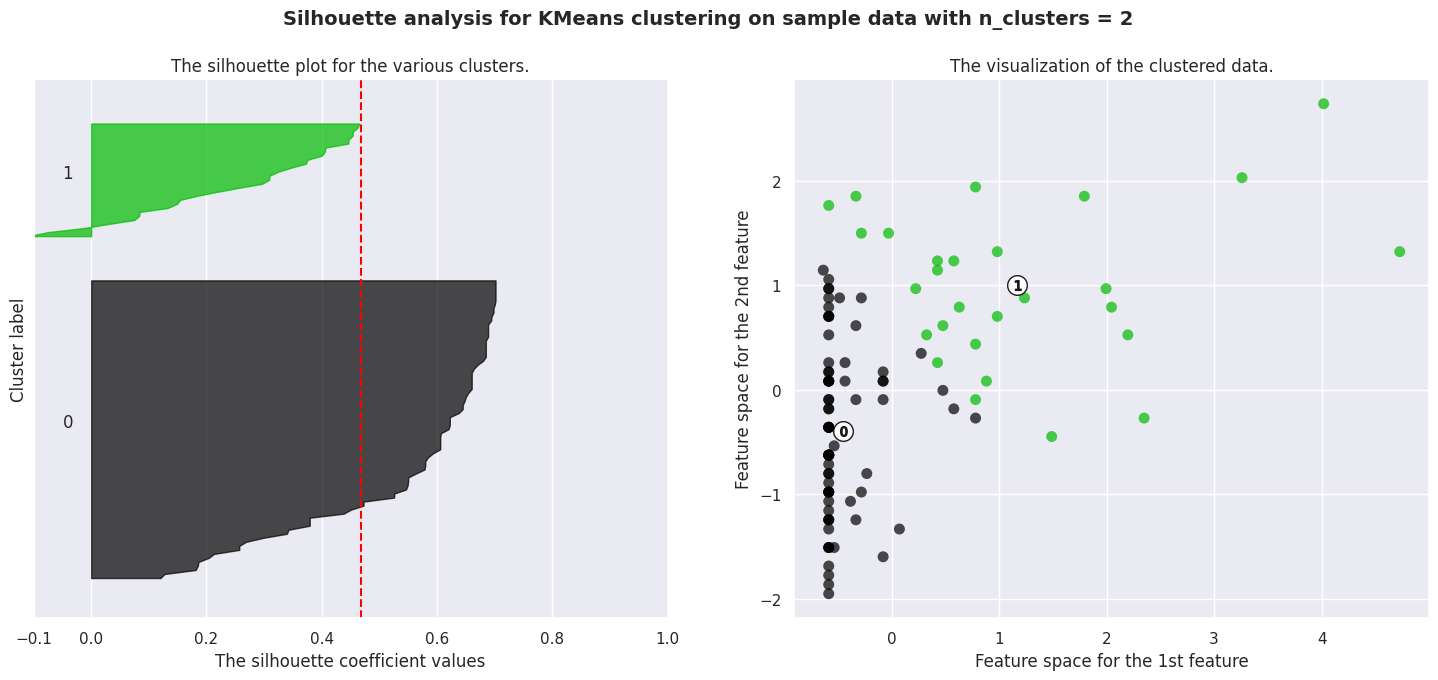

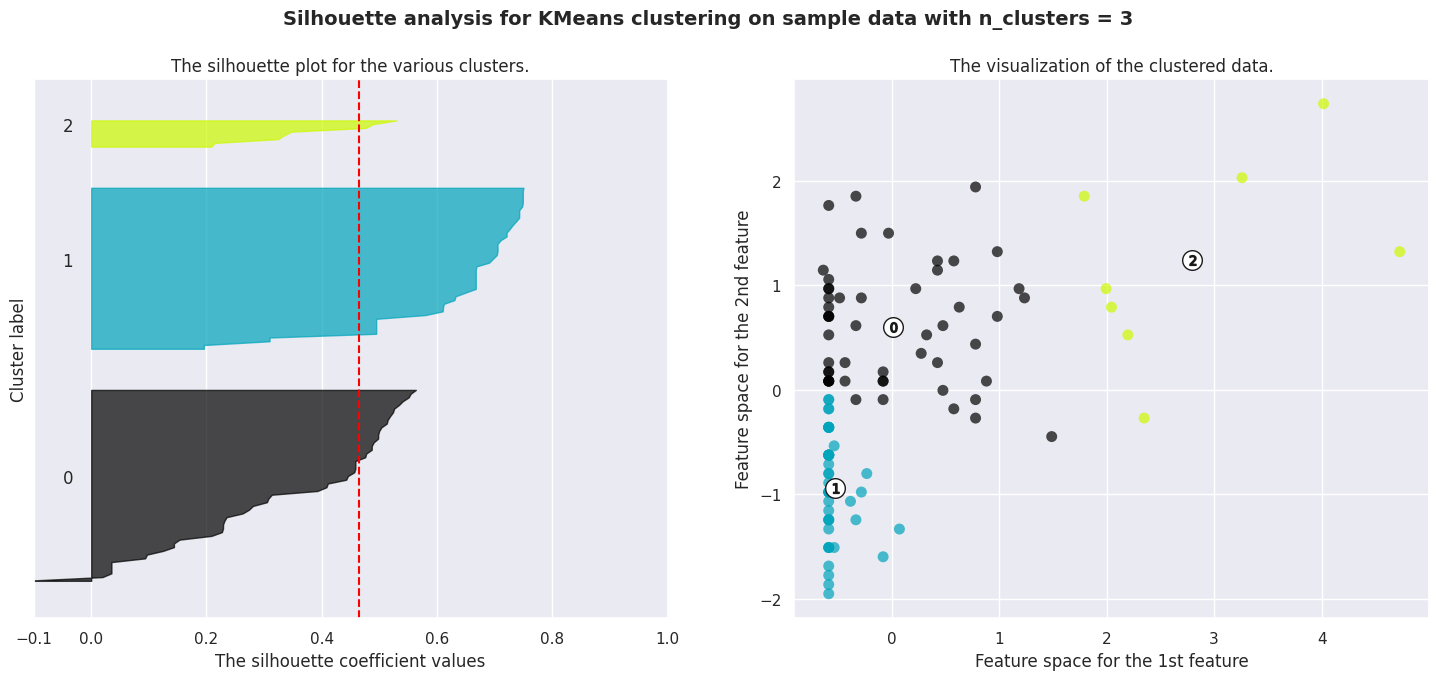

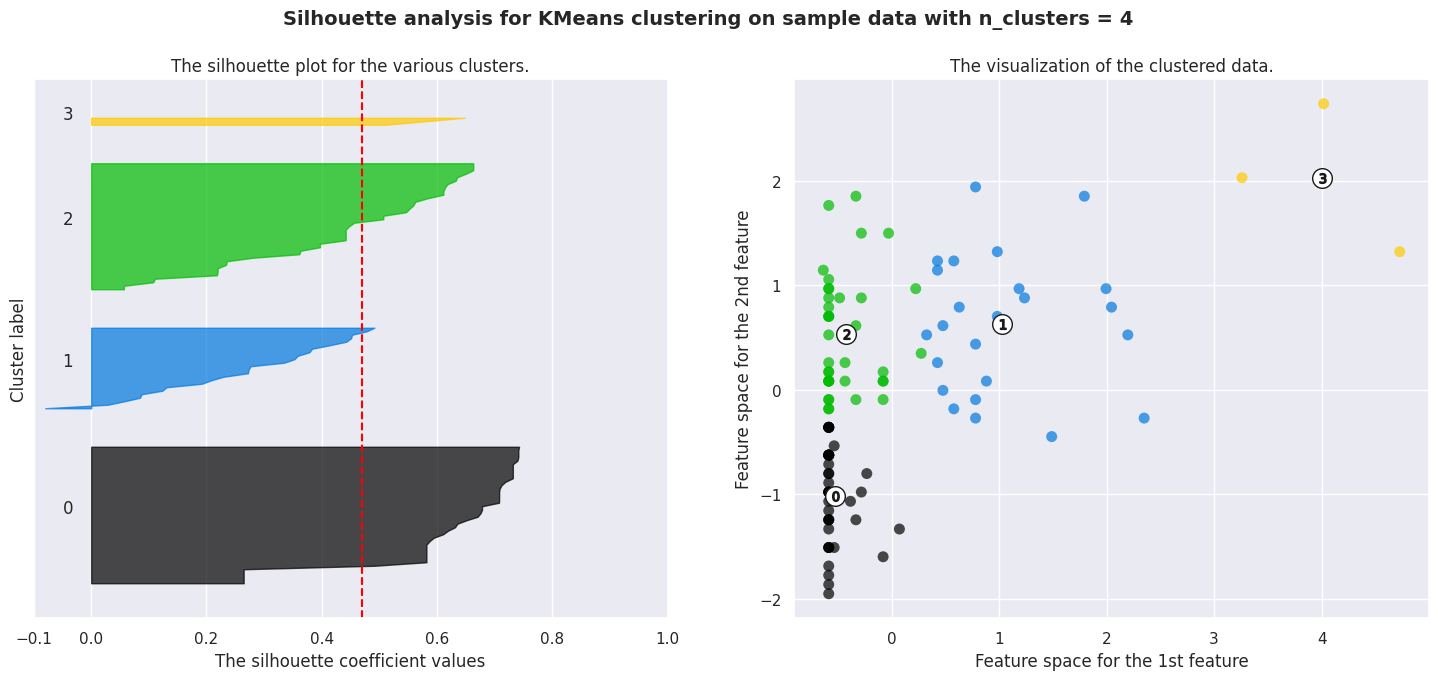

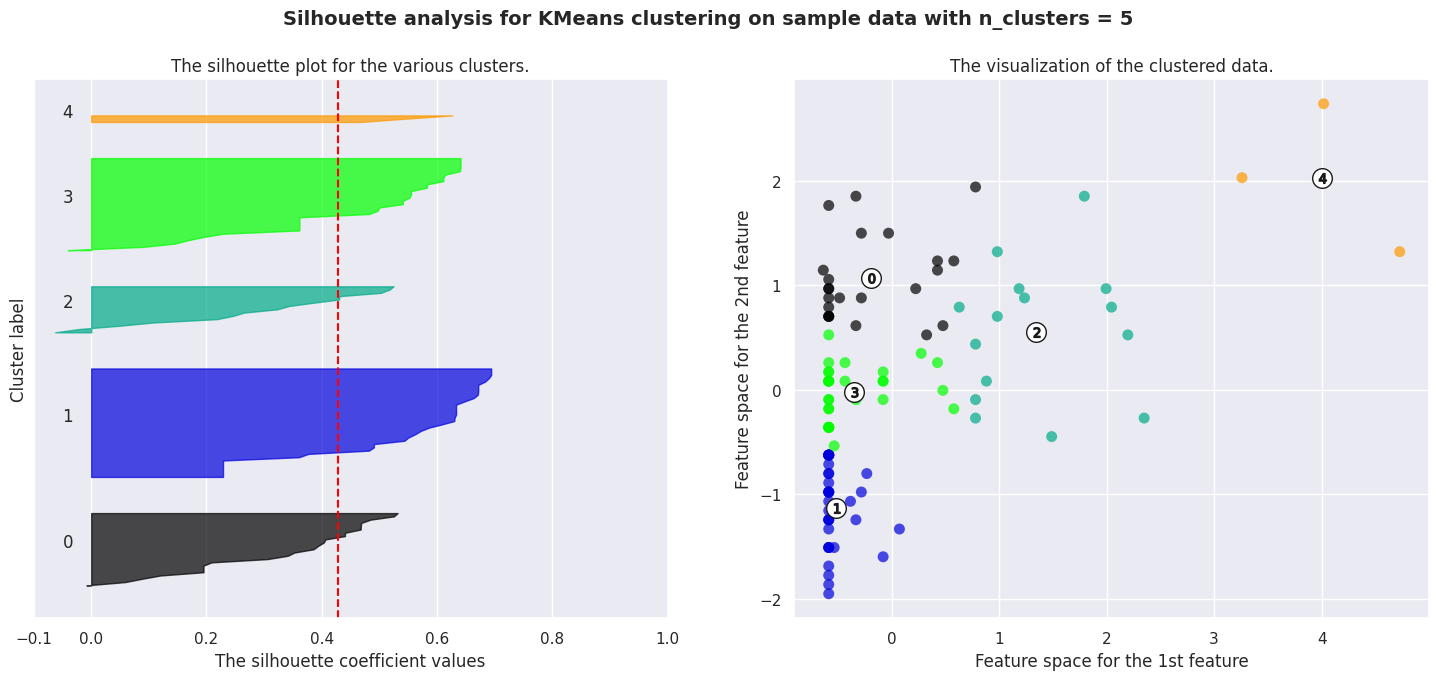

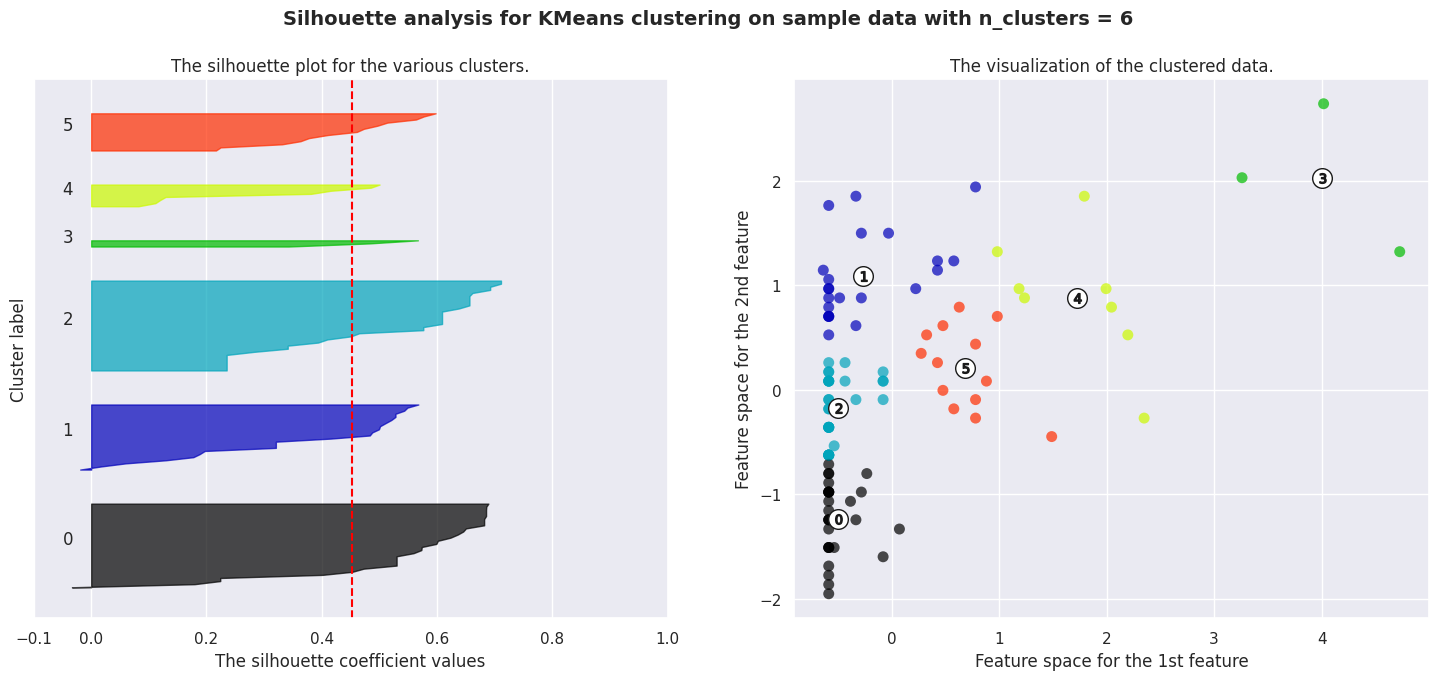

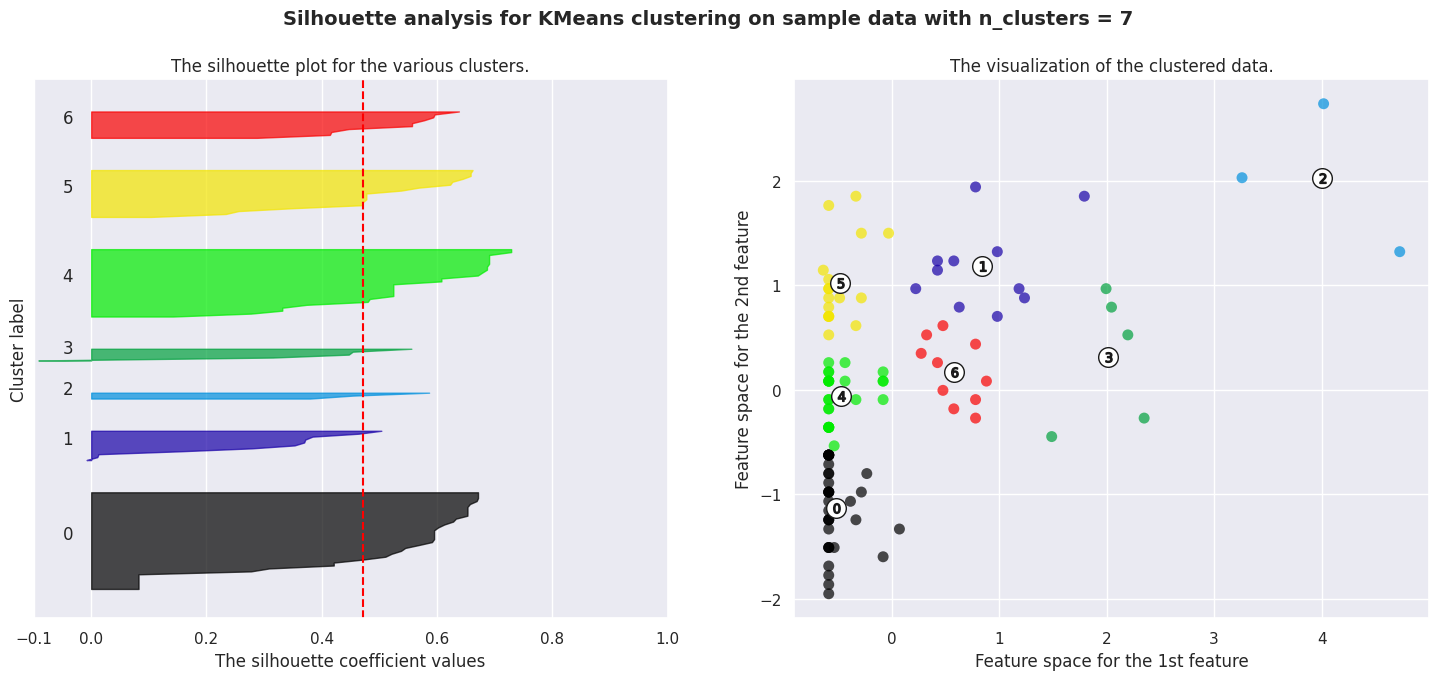

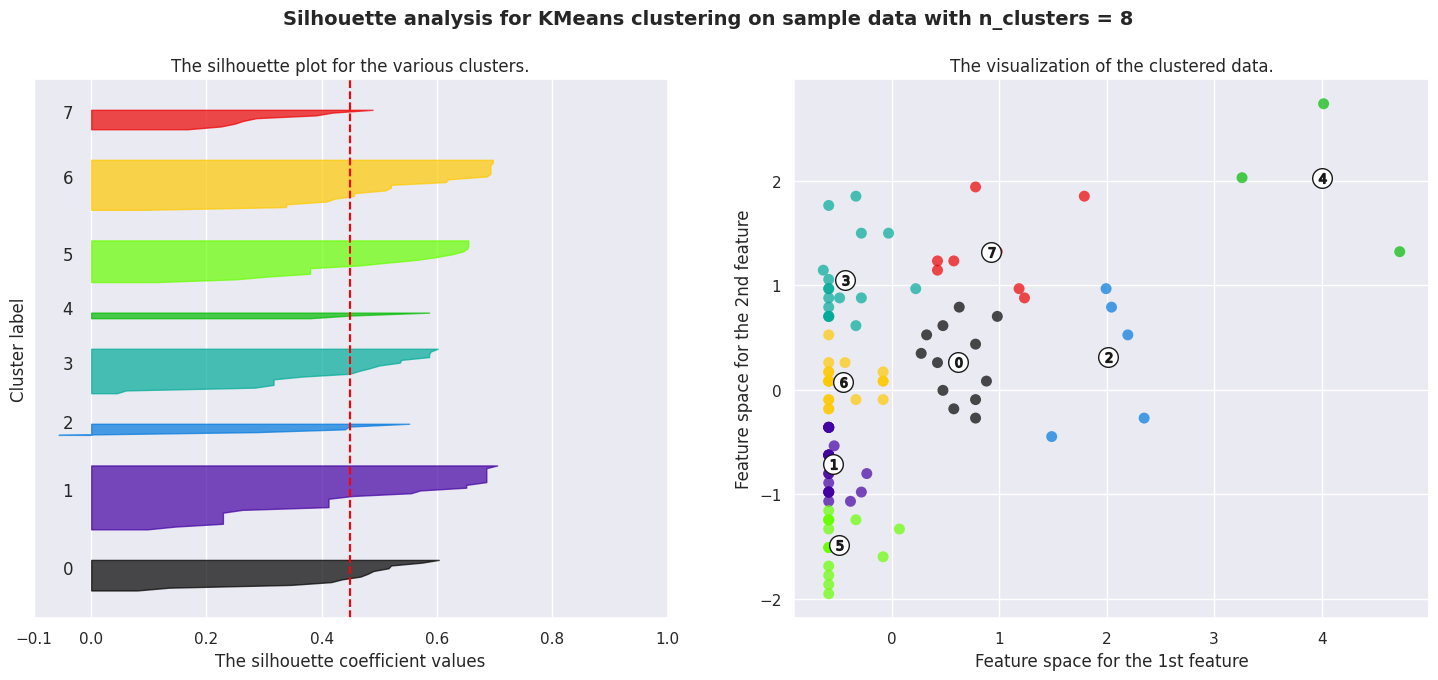

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=250, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### **K Mean Clustering**
#### **Applying Elbow Method**

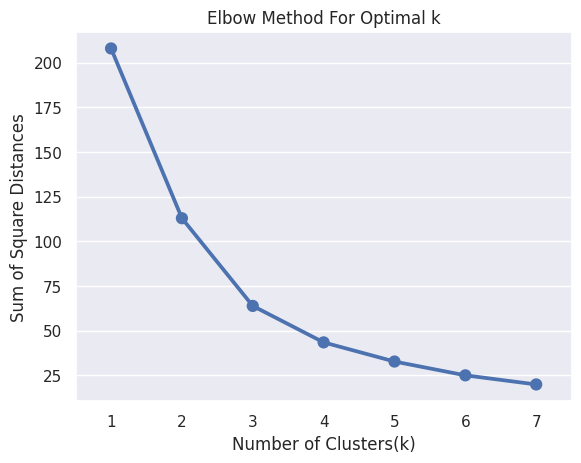

In [ ]:
X_features_rec_mon=copy_metadata[["collections", "cuisines"]]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X = X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,8):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

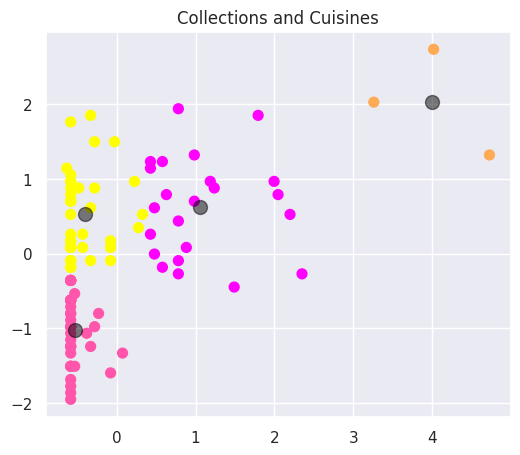

In [ ]:
plt.figure(figsize=(6,5))
plt.title('Collections and Cuisines')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

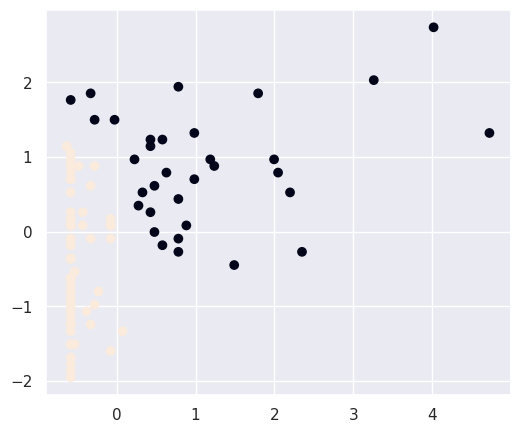

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y_pred)

### **Dendrogram to find optimal number of cluster**

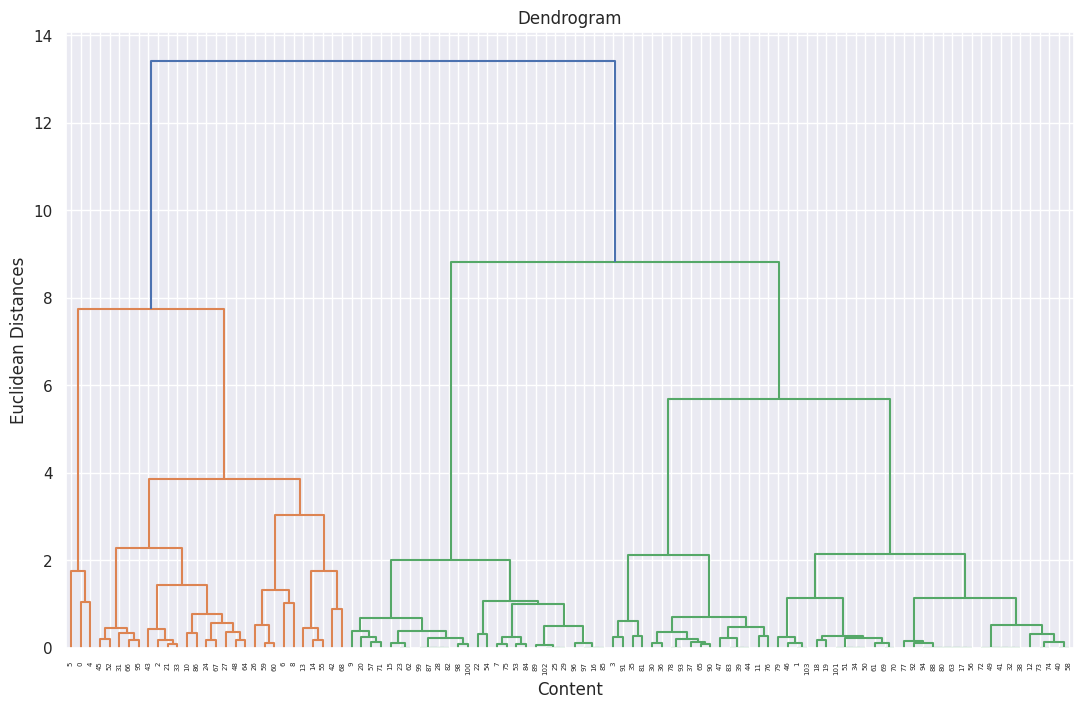

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

### Agglomerative hierarchical Clustering

In [ ]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

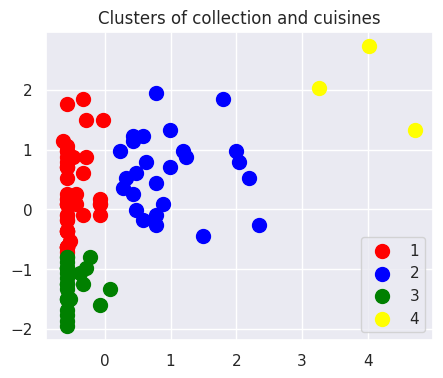

In [ ]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(5,4))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'yellow', label = '4')

plt.title('Clusters of collection and cuisines')

plt.legend()
plt.show()

* By applying different clustering algorithem to our dataset .we get the optimal number of cluster is equal to 4

### <font color='red'>----- Sentiment Analysis 😡|😦|😄 ------</font>

In [ ]:
#Reading dataset
reviews = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')

In [ ]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
reviews.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In [ ]:
# dimension of data
reviews.shape

(10000, 7)

In [ ]:
reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
# duplicate
print('Duplicate of Zomato Restaurant Data:', len(reviews[reviews.duplicated()]))

Duplicate of Zomato Restaurant Data: 36


In [ ]:
# Check metadata Review Data Information
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
reviews.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
#drop NaN values

reviews.dropna(how='any',inplace=True)

reviews.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [ ]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in reviews.columns if reviews[feature].isnull().sum()>1 and reviews[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(reviews[feature].isnull().mean(),4)))

In [ ]:
#drop unnecessary coulmn
#reviews.drop(['Pictures','Time', 'Metadata', 'Reviewer', 'Restaurant'],axis= 1,inplace= True)

In [ ]:
#reviews.info()

In [ ]:
reviews.describe()

,Pictures
count,9955.000000
mean,0.751984
std,2.575691
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [ ]:
reviews.Rating.value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
# Remove Row which has Rating = Like as it is has just one

reviews = reviews[reviews["Rating"] != "Like"]
reviews["Rating"].value_counts()

5      3826
4      2373
1      1735
3      1192
2       684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

Text(0, 0.5, 'Counts')

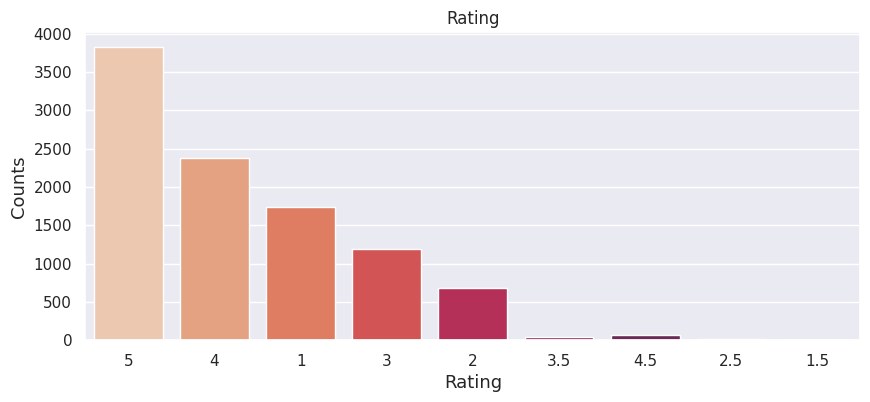

In [ ]:
plt.figure(figsize = (10,4))
sns.countplot(x='Rating', data=reviews, palette='rocket_r')
plt.title('Rating')
plt.xlabel('Rating', fontsize=13)
plt.ylabel('Counts', fontsize=13)

In [ ]:
#Convert Rating Data Type to float

reviews["Rating"] = reviews["Rating"].astype("float")

In [ ]:
# Cnovert Metadata object type to str

reviews["Metadata"] = reviews["Metadata"].astype("str")

In [ ]:
# Split Metadata Column in No_of_Reviews and No_of_Followers Column
reviews[['No_of_Reviews','No_of_Followers']] = reviews["Metadata"].str.split("," , expand=True)

# Delete Metadata Column
del reviews["Metadata"]
reviews.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No_of_Reviews,No_of_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1 Review,2 Followers
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3 Reviews,2 Followers
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2 Reviews,3 Followers
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1 Review,1 Follower
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3 Reviews,2 Followers


In [ ]:
# Delete characters from No_of_Reviews and No_of_Followers Column and Make it a numeric data type

reviews['No_of_Reviews'] = pd.to_numeric(reviews['No_of_Reviews'].str.replace(r'\D+', ''))
reviews['No_of_Followers'] = pd.to_numeric(reviews['No_of_Followers'].str.replace(r'\D+', ''))
reviews[:3]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No_of_Reviews,No_of_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3.0


In [ ]:
#grounping reviewer list by count
reviewer_list = reviews.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:5]
top_reviewers.head()

,Reviewer,Review_Count
654,Ankita,13
3855,Parijat Ray,13
2652,Kiran,12
7009,Vedant Killa,11
2311,Jay Mehta,11


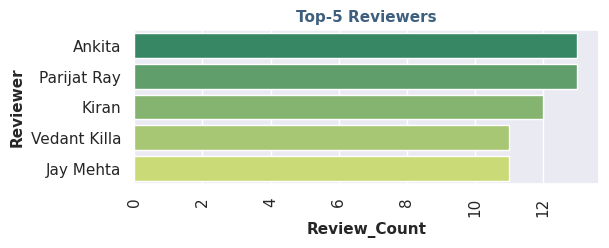

In [ ]:
# top reviewers who have more reviews
plt.figure(figsize=(6,2))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top-5 Reviewers",fontsize=11, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=11)
plt.xlabel("No. of Reviews",weight='bold',fontsize=11)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='summer')
plt.show()

In [ ]:
# Average of the ratings of review count
review_ratings=reviews.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='AverageRatings')
review_ratings=pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings=review_ratings[:5]
top_reviewers_ratings=top_reviewers_ratings.sort_values(by = 'AverageRatings',ascending=False)
top_reviewers_ratings.head()

,Reviewer,Review_Count,AverageRatings
2,Kiran,12,4.500000
3,Vedant Killa,11,4.000000
0,Ankita,13,3.923077
4,Jay Mehta,11,3.727273
1,Parijat Ray,13,3.192308


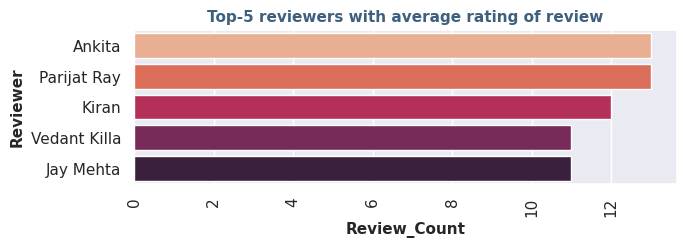

In [ ]:
# Average ratings of top reviewers
plt.figure(figsize=(7,2))
plt.title("Top-5 reviewers with average rating of review",fontsize=11, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=11)
plt.xlabel("Average Rating",weight='bold',fontsize=11)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rocket_r')
plt.show()

In [ ]:
# Replace null values with 0 and convert column to int data type
reviews["No_of_Followers"] = reviews["No_of_Followers"].replace(np.nan, 0)
reviews["No_of_Followers"] = reviews["No_of_Followers"].astype("int")

In [ ]:
# Top 10 Rated Restaurants
top_Rest = reviews.groupby("Restaurant")["Rating"].agg("mean").to_frame().reset_index().sort_values(by = "Rating", ascending = False)
top_Restaurant = top_Rest[:5]
top_Restaurant

,Restaurant,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66


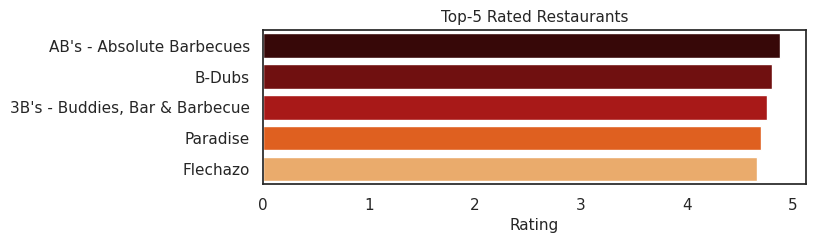

In [ ]:
sns.set_style("white")
plt.figure(figsize = (7, 2))
sns.barplot(x = "Rating", y = "Restaurant", data = top_Restaurant, palette = "gist_heat")
plt.title("Top-5 Rated Restaurants", size = 11)
plt.xticks(size =11)
plt.yticks(size = 11)
plt.xlabel("Rating", size = 11)
plt.ylabel(None)
plt.show()

In [ ]:
# Top 10 Reviewed Restaurants

top_rev = reviews.groupby("Restaurant")["No_of_Reviews"].agg("sum").reset_index().sort_values(by = "No_of_Reviews", ascending = False)
top_reviews = top_rev[:5]
top_reviews

,Restaurant,No_of_Reviews
55,Labonel,6628
68,Pista House,5429
20,Chinese Pavilion,5409
31,Dunkin' Donuts,5289
89,The Old Madras Baking Company,5115


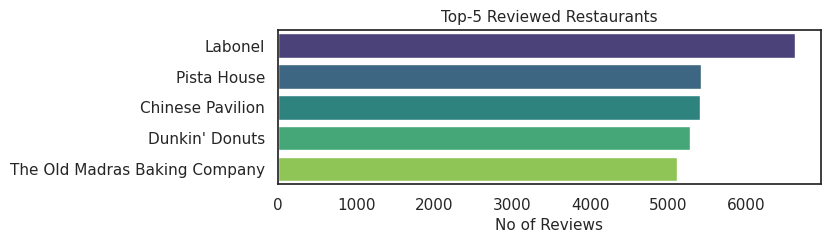

In [ ]:
#Top Reviewed Restaurants
plt.figure(figsize = (7, 2))
sns.barplot(x = "No_of_Reviews", y = "Restaurant", data = top_reviews, palette = "viridis")
plt.title("Top-5 Reviewed Restaurants", size = 11)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.xlabel("No of Reviews", size = 11)
plt.ylabel(None)
plt.show()

In [ ]:
#Top Followed Restaurants
top_followers = reviews.groupby("Restaurant")["No_of_Followers"].agg("sum").reset_index().sort_values(by = "No_of_Followers", ascending = False)
Top_followers= top_followers[:5]
Top_followers

,Restaurant,No_of_Followers
68,Pista House,51068
52,Komatose - Holiday Inn Express & Suites,46229
44,Hyderabadi Daawat,45375
90,The Tilt Bar Republic,42126
31,Dunkin' Donuts,37667


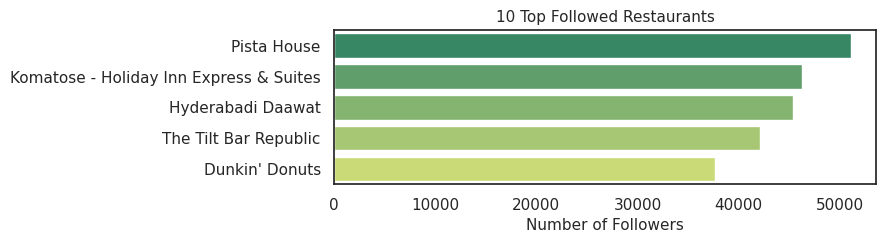

In [ ]:
plt.figure(figsize = (7, 2))
sns.barplot(x = "No_of_Followers", y = "Restaurant", data = Top_followers, palette = "summer")
plt.title("10 Top Followed Restaurants", size = 11)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.xlabel("Number of Followers", size = 11)
plt.ylabel(None)
plt.show()

In [ ]:
#TextBlob is a Python (2 and 3) library for processing textual data
'''from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px'''

'from textblob import TextBlob\nfrom sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer\nimport plotly.express as px'

In [ ]:
#Creating a function to get subjectivity
'''def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity'''

'def subjectivity(text): \n    return TextBlob(text).sentiment.subjectivity'

In [ ]:
#Creating a function to get polarity
'''def polarity(text):
    return TextBlob(text).sentiment.polarity'''

'def polarity(text): \n    return TextBlob(text).sentiment.polarity'

In [ ]:
#Creating two separate columns for polarity and subjectivity
'''reviews['Subjectivity'] = reviews['Review'].apply(subjectivity)
reviews['Polarity'] = reviews['Review'].apply(polarity)'''

"reviews['Subjectivity'] = reviews['Review'].apply(subjectivity)\nreviews['Polarity'] = reviews['Review'].apply(polarity)"

In [ ]:
#Creating a function for computing negative, neutral and positive analysis
'''def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'''

"def getAnalysis(score):\n    if score <0:\n        return 'Negative'\n    elif score == 0:\n        return 'Neutral'\n    else:\n        return 'Positive"

In [ ]:
#applying getAnalysis
''''reviews['Analysis'] = reviews['Polarity'].apply(getAnalysis)'''

"'reviews['Analysis'] = reviews['Polarity'].apply(getAnalysis)"

In [ ]:
#ploting the polarity and subjectivity
'''fig = px.scatter(reviews, x='Polarity', y='Subjectivity', color = 'Analysis',size='Subjectivity')'''

"fig = px.scatter(reviews, x='Polarity', y='Subjectivity', color = 'Analysis',size='Subjectivity')"

In [ ]:
#adding a vertical line at x=0 for Netural Reviews
'''fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1,
                               xref= 'x', x0= 0, x1= 0)])
fig.show()'''

"fig.update_layout(title='Sentiment Analysis',\n                  shapes=[dict(type= 'line',\n                               yref= 'paper', y0= 0, y1= 1, \n                               xref= 'x', x0= 0, x1= 0)])\nfig.show()"

In [ ]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No_of_Reviews,No_of_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2


In [ ]:
# Converting Time column into Time, Year, Month, Hour
#reviews['Time']=pd.to_datetime(reviews['Time'])
#reviews['Year'] = pd.DatetimeIndex(reviews['Time']).year
#reviews['Month'] = pd.DatetimeIndex(reviews['Time']).month
reviews['Hour'] = pd.DatetimeIndex(reviews['Time']).hour
#reviews = reviews.drop(['Metadata'], axis =1)

In [ ]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No_of_Reviews,No_of_Followers,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2,21


In [ ]:
# Reviews per hour
reviews_hr = reviews.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')

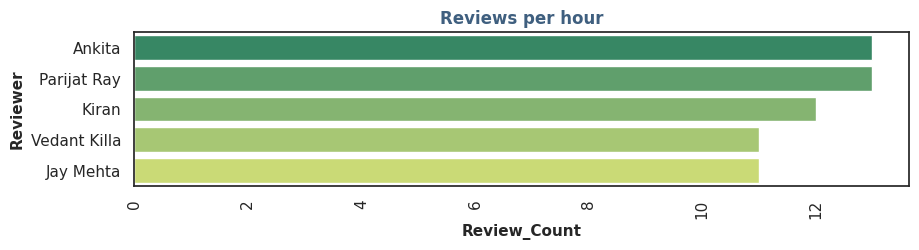

In [ ]:
# plotting reviews per hour
plt.figure(figsize=(10,2))
plt.title("Reviews per hour",fontsize=12, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=11)
plt.xlabel("Hour",weight='bold',fontsize=11)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='summer')
plt.show()


(-0.5, 1399.5, 1399.5, -0.5)

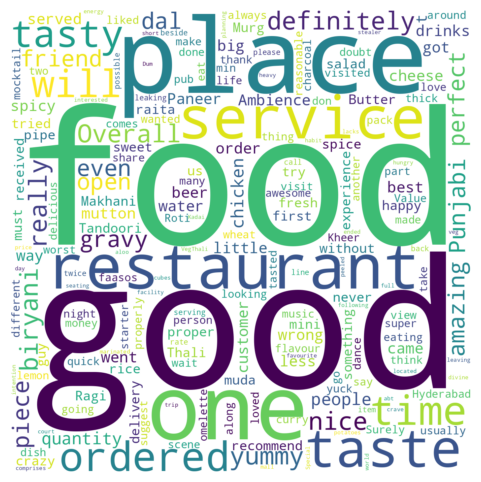

In [ ]:
#Creating word cloud for reviews
plt.figure(figsize=(20,6))
text = " ".join(name for name in reviews.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
#having a look on the data
review= reviews.Review
review.head()

0    The ambience was good, food was quite good . h...
1    Ambience is too good for a pleasant evening. S...
2    A must try.. great food great ambience. Thnx f...
3    Soumen das and Arun was a great guy. Only beca...
4    Food is good.we ordered Kodi drumsticks and ba...
Name: Review, dtype: object

In [ ]:
#removing punctuations
reviews['Review'] = reviews['Review'].apply(remove_punctuation)

In [ ]:
#applying stopwords
reviews['Review'] = reviews['Review'].apply(stopwords)

In [ ]:
#looking the data after removing the stopwords
review=reviews.Review
review

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9995    madhumathi mahajan well start nice courteous s...
9996    place never disappointed us food courteous sta...
9997    bad rating mainly chicken bone found veg food ...
9998    personally love prefer chinese food couple tim...
9999    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9954, dtype: object

In [ ]:
#spaCy is a free open-source library for Natural Language Processing in Python
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
#Lemmatization is the grouping together of different forms of the same word
def lemmatization_(text):
  for index,x in enumerate(text):
    doc = nlp(x)
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)
  return text

In [ ]:
review1=lemmatization_(review)

In [ ]:
# removing extra spaces
def remove_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text

In [ ]:
review=remove_spaces(review)

In [ ]:
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [ ]:
review1=remove_non_leters(review)

In [ ]:
# storing the reviews in a feature of df
reviews['Review']=review
reviews.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No_of_Reviews,No_of_Followers,Hour
0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,5/25/2019 15:54,0,1,2,15
1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,5/25/2019 14:20,0,3,2,14
2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,5/24/2019 22:54,0,2,3,22
3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,5/24/2019 22:11,0,1,1,22
4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,5/24/2019 21:37,0,3,2,21


In [ ]:
#function to remove words greater than string length 45 but less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [ ]:
#applying function len_less_than2
reviews['Review']=reviews['Review'].apply(lambda x:len_less_than2(x))

In [ ]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No_of_Reviews,No_of_Followers,Hour
0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,5/25/2019 15:54,0,1,2,15
1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,5/25/2019 14:20,0,3,2,14
2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,5/24/2019 22:54,0,2,3,22
3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,5/24/2019 22:11,0,1,1,22
4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,5/24/2019 21:37,0,3,2,21


In [ ]:
#TextBlob is a Python (2 and 3) library for processing textual data
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px

In [ ]:
#Creating a function to get subjectivity
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
#Creating a function to get polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
#Creating two separate columns for polarity and subjectivity
reviews['Subjectivity'] = reviews['Review'].apply(subjectivity)
reviews['Polarity'] = reviews['Review'].apply(polarity)

In [ ]:
#Creating a function for computing negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
reviews['Analysis'] = reviews['Polarity'].apply(getAnalysis)

In [ ]:
#ploting the polarity and subjectivity
fig = px.scatter(reviews, x='Polarity', y='Subjectivity', color = 'Analysis',size='Subjectivity')

In [ ]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No_of_Reviews,No_of_Followers,Hour,Subjectivity,Polarity,Analysis
0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,5/25/2019 15:54,0,1,2,15,0.720000,0.660000,Positive
1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,5/25/2019 14:20,0,3,2,14,0.691667,0.708333,Positive
2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,5/24/2019 22:54,0,2,3,22,0.675000,0.550000,Positive
3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,5/24/2019 22:11,0,1,1,22,0.675000,0.750000,Positive
4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,5/24/2019 21:37,0,3,2,21,0.475000,0.500000,Positive


In [ ]:
#adding a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1,
                               xref= 'x', x0= 0, x1= 0)])
fig.show()